# Redes Neuronales Artificiales (RNA)


## Parte 1 - Preprocesado de los datos

### Importar las librerías


In [1]:
!pip install scikeras[tensorflow]  # Para utilizar la clase KerasClassifier()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 40.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier


### Importar el dataset


In [3]:
from google.colab import drive
drive.mount("/content/drive")

%cd "/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)"

Mounted at /content/drive
/content/drive/MyDrive/deeplearning-az/Notebooks/Part 1 - Artificial Neural Networks (ANN)


In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



### Codificar datos categóricos


In [5]:
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)
y = df["Exited"]

X = X.values  # Nos quedamos con los valores de las variables dependientes
y = y.values  # Nos quedamos con los valores de la variables respuesta


### Dividir el dataset en Conjunto de Entrenamiento y Conjunto de Test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Escalado de variables


In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Parte 2 - Construir la RNA




In [8]:
# Inicializar la RNA
classifier = Sequential()

# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform",
                     activation="relu", input_dim=11))
classifier.add(Dropout(rate=0.1))

# Añadir la segunda capa oculta
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dropout(rate=0.1))

# Añadir la capa de salida
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

# Compilar la RNA
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 14s 5ms/step - loss: 0.4879 - accuracy: 0.7954
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 0.4348 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 4s 4ms/step - loss: 0.4317 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4303 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.8033
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4280 - accuracy: 0.8210
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4260 - accuracy: 0.8241
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4250 - accuracy: 0.8269
Epoch 9/100
800/800 [==============================] - 4s 4ms/step - loss: 0.4243 - accuracy: 0.8266
Epoch 10/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4269 - accur

## Parte 3 - Evaluar el modelo y calcular predicciones finales


### Predicción de los resultados con el Conjunto de Test

In [9]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


### Elaborar una matriz de confusión



              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1595
           1       0.76      0.29      0.42       405

    accuracy                           0.84      2000
   macro avg       0.80      0.64      0.66      2000
weighted avg       0.83      0.84      0.81      2000



<Axes: >

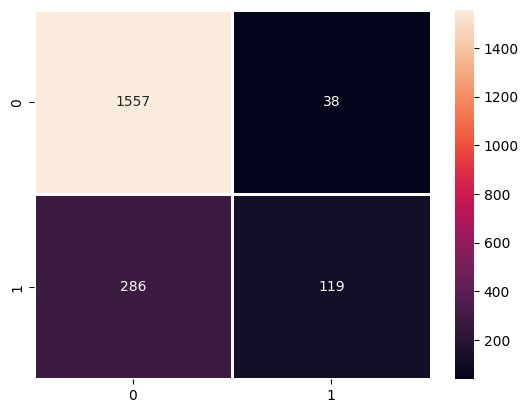

In [10]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, linewidths=1, annot=True, fmt=".0f")

In [11]:
# Valor del accuracy
acc = (cm[0][0] + cm[1][1]) / cm.sum()
print(acc)

0.838


## RETO FINAL: ¿Deberíamos despedirnos de ese cliente?

Utiliza nuestro modelo de RNA para predecir si el cliente con la siguiente información abandonará el banco:

- Geografia: Francia

- Puntaje de crédito: 600

- Género masculino

- Edad: 40 años de edad

- Tenencia: 3 años.

- Saldo: $\$60000$

- Número de productos: 2

- ¿Este cliente tiene una tarjeta de crédito? Sí

- ¿Es este cliente un miembro activo? Sí

- Salario estimado: $\$50000$

Entonces, ¿deberíamos decir adiós a ese cliente?

In [12]:
# Escalamos la observación
X_test_observacion = sc_X.transform(np.array([[600, 40, 3, 60000, 2, 1, 1, 50000, 0, 0, 1]]))

# Escalamos la observación
y_pred_observacion = classifier.predict(X_test_observacion)

# Establecemos punto de corte donde se determina cuando es 0/1 (False/True)
y_pred_observacion = (y_pred_observacion > 0.5)

if y_pred_observacion:
    print("Se predice que el cliente SÍ abandonará el banco")
else:
    print("Se predice que el cliente NO abandonará el banco")

1/1 [==============================] - 0s 30ms/step
Se predice que el cliente NO abandonará el banco
